<a href="https://colab.research.google.com/github/dinithprimal/MachineLearning-HandsOn/blob/main/Project_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import math
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.metrics import r2_score

In [ ]:
route = pd.read_csv("/content/Vehicle_Data.csv")

In [ ]:
route.head(5)

,Day,Time,Rd_01 No. Vehicles,Rd_01 Avg. Speed (km/h),Rd_02 No. Vehicles,Rd_02 Avg. Speed (km/h),Rd_03 No. Vehicles,Rd_03 Avg. Speed (km/h)
0,Monday,00:00 - 00:30,5,55,10,73,2,78
1,Monday,00:30 - 01:00,6,53,5,85,4,68
2,Monday,01:00 - 01:30,2,71,5,88,5,50
3,Monday,01:30 - 02:00,2,77,6,83,6,53
4,Monday,02:00 - 02:30,5,55,4,84,5,53


In [ ]:
print("size/shape of the dataset", route.shape)
print("checking fro null values", route.isnull().sum())
print("checking the Data-Type", route.dtypes)

size/shape of the dataset (9408, 8)
checking fro null values Day                        0
Time                       0
Rd_01 No. Vehicles         0
Rd_01 Avg. Speed (km/h)    0
Rd_02 No. Vehicles         0
Rd_02 Avg. Speed (km/h)    0
Rd_03 No. Vehicles         0
Rd_03 Avg. Speed (km/h)    0
dtype: int64
checking the Data-Type Day                        object
Time                       object
Rd_01 No. Vehicles          int64
Rd_01 Avg. Speed (km/h)     int64
Rd_02 No. Vehicles          int64
Rd_02 Avg. Speed (km/h)     int64
Rd_03 No. Vehicles          int64
Rd_03 Avg. Speed (km/h)     int64
dtype: object


In [ ]:
def mean_squared_error(y_true, y_predicted):
  # Calculating the loss or cost
  l = len(y_true)
  cost = 0
  for i in range(l):
    cost = (y_true[i]-y_predicted[i])**2 + cost

  cost = cost/l
  return cost
 
# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001,
                     stopping_threshold = 1e-6):
  # Initializing weight, bias, learning rate and iterations
  current_weight = 0.1
  current_bias = 0.01
  iterations = iterations
  learning_rate = learning_rate
  n = len(x)

  costs = []
  weights = []
  previous_cost = None

  y_predicted = []

  
  # Estimation of optimal parameters
  for i in range(iterations):
    # Making predictions
    for j in range(n):
      y_predicted.append((current_weight * x[j]) + current_bias)
    
    # Calculationg the current cost
    current_cost = mean_squared_error(y, y_predicted)
    # If the change in cost is less than or equal to
    # stopping_threshold we stop the gradient descent
    if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
      break

    previous_cost = current_cost
    costs.append(current_cost)
    weights.append(current_weight)
         
    # Calculating the gradients
    weight_derivative = 0
    bias_derivative = 0
    for i in range(n):
      weight_derivative = x[i] * (y[i]-y_predicted[i]) + weight_derivative
      #weight_derivative = -(2/n) * sum(x * (y-y_predicted))
      #bias_derivative = -(2/n) * sum(y-y_predicted)
      bias_derivative = (y[i]-y_predicted[i]) + bias_derivative

    weight_derivative = -(2/n) * weight_derivative
    bias_derivative = -(2/n) * bias_derivative
         
    # Updating weights and bias
    current_weight = current_weight - (learning_rate * weight_derivative)
    current_bias = current_bias - (learning_rate * bias_derivative)
              
    # Printing the parameters for each 1000th iteration
    #print(f"Iteration {i+1}: Cost {current_cost}, Weight \
    #{current_weight}, Bias {current_bias}")
     
     
    # Visualizing the weights and cost at for all iterations
    #plt.figure(figsize = (8,6))
    #plt.plot(weights, costs)
    #plt.scatter(weights, costs, marker='o', color='red')
    #plt.title("Cost vs Weights")
    #plt.ylabel("Cost")
    #plt.xlabel("Weight")
    #plt.show()
     
  return current_weight, current_bias

In [ ]:
def predict(day,timeIn,timeOut,noVehicle):
  selDay = route[route['Day']==day]

  arDay = selDay[selDay['Time']==timeIn +' - '+timeOut]

  x_rd01 = []
  y_rd01 = []

  x_rd02 = []
  y_rd02 = []

  x_rd03 = []
  y_rd03 = []

  for val in arDay['Rd_01 No. Vehicles']:
    x_rd01.append(val)

  for val in arDay['Rd_01 Avg. Speed (km/h)']:
    y_rd01.append(val)

  for val in arDay['Rd_02 No. Vehicles']:
    x_rd02.append(val)

  for val in arDay['Rd_02 Avg. Speed (km/h)']:
    y_rd02.append(val)

  for val in arDay['Rd_03 No. Vehicles']:
      x_rd03.append(val)

  for val in arDay['Rd_03 Avg. Speed (km/h)']:
    y_rd03.append(val)

  slope_rd01, intercept_rd01, r_rd01, p_rd01, std_err_rd01 = stats.linregress(x_rd01, y_rd01)

  slope_rd02, intercept_rd02, r_rd02, p_rd02, std_err_rd02 = stats.linregress(x_rd02, y_rd02)

  slope_rd03, intercept_rd03, r_rd03, p_rd03, std_err_rd03 = stats.linregress(x_rd03, y_rd03)

  #estimated_weight_rd01, eatimated_bias_rd01 = gradient_descent(x_rd01, y_rd01, iterations=2000)
  #estimated_weight_rd02, eatimated_bias_rd02 = gradient_descent(x_rd02, y_rd02, iterations=2000)
  #estimated_weight_rd03, eatimated_bias_rd03 = gradient_descent(x_rd03, y_rd03, iterations=2000)
  

  def myfunc_rd01(x):
    return slope_rd01 * x + intercept_rd01

  speed_rd01 = myfunc_rd01(noVehicle)
  if(speed_rd01<10):
    speed_rd01 = 10
  elif(speed_rd01>90):
    speed_rd01 = 90

  def myfunc_rd02(x):
    return slope_rd02 * x + intercept_rd02

  speed_rd02 = myfunc_rd02(noVehicle)
  if(speed_rd02<10):
    speed_rd02 = 10
  elif(speed_rd02>90):
    speed_rd02 = 90

  def myfunc_rd03(x):
    return slope_rd03 * x + intercept_rd03

  speed_rd03 = myfunc_rd03(noVehicle)
  if(speed_rd03<10):
    speed_rd03 = 10
  elif(speed_rd03>90):
    speed_rd03 = 90

  print("Avarage speed of route 01: %.2f" %speed_rd01)
  print("Time taken to travel through the route 01: %.2f Hours\n" %(25/speed_rd01))
  print("Avarage speed of route 02: %.2f" %speed_rd02)
  print("Time taken to travel through the route 02: %.2f Hours\n" %(35/speed_rd02))
  print("Avarage speed of route 03: %.2f" %speed_rd03)
  print("Time taken to travel through the route 03: %.2f Hours\n" %(26/speed_rd03))

  #print(r)

  mymodel_rd01 = list(map(myfunc_rd01, x_rd01))
  mymodel_rd02 = list(map(myfunc_rd02, x_rd02))
  mymodel_rd03 = list(map(myfunc_rd03, x_rd03))

  fig = plt.figure()

  #ax1 = fig.add_subplot(221)
  #ax2 = fig.add_subplot(222)
  #ax3 = fig.add_subplot(223)

  plt.scatter(x_rd01, y_rd01)
  plt.plot(x_rd01, mymodel_rd01)

  plt.scatter(x_rd02, y_rd02)
  plt.plot(x_rd02, mymodel_rd02)

  plt.scatter(x_rd03, y_rd03)
  plt.plot(x_rd03, mymodel_rd03)

  plt.xlabel('Average Number of Vehicles ('+day+' at '+timeIn+' to '+timeOut+')')
  plt.ylabel('Average Speed (km/h)')
  #plt.show()

#sunday.head(5)

Enter Day : Monday
Enter Time in 24 hours(hh:mm): 18:23
Enter Number of Vehicles : 10



Avarage speed of route 01: 39.08
Time taken to travel through the route 01: 0.64 Hours

Avarage speed of route 02: 42.25
Time taken to travel through the route 02: 0.83 Hours

Avarage speed of route 03: 39.16
Time taken to travel through the route 03: 0.66 Hours



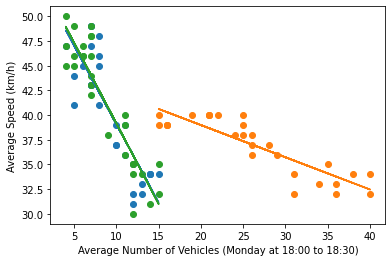

In [ ]:
day = input("Enter Day : ")
time = input("Enter Time in 24 hours(hh:mm): ")
inTime = "00:00"
outTime = "00:30"
if (int(time[3:])<30):
  inTime = time[0:3]+"00"
  outTime = time[0:3]+"30"
else:
  inTime = time[0:3]+"30"
  hr = int(time[0:2])+1
  outTime = str(hr)+":00"
noVehicles = input("Enter Number of Vehicles : ")
print("\n\n")
predict(day,inTime,outTime,int(noVehicles))